## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Reading data into pandas dataframe

In [2]:
df = pd.read_json('data.json')

## The first and last five rows of the data

In [3]:
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [4]:
df.tail()

,Duration,Pulse,Maxpulse,Calories
164,60,105,140,290.8
165,60,110,145,300.4
166,60,115,145,310.2
167,75,120,150,320.4
168,75,125,150,330.4


## Some Information and summary statistics about te data

In [5]:
df.shape

(169, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.6 KB


In [7]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.800000
std,42.299949,14.510259,16.450434,266.377134
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [8]:
df.isna().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

## Showing the correlation between the features

In [9]:
df.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.155408,0.009403,0.922721
Pulse,-0.155408,1.000000,0.786535,0.025120
Maxpulse,0.009403,0.786535,1.000000,0.203814
Calories,0.922721,0.025120,0.203814,1.000000


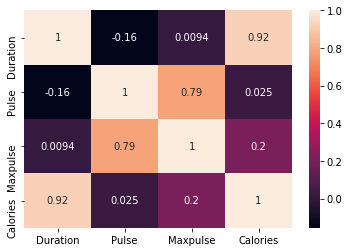

In [10]:
# As wee can see there is a strong positive correlation
# between Duration and calories with 0.92

sns.heatmap(df.corr(),annot=True)
plt.show()

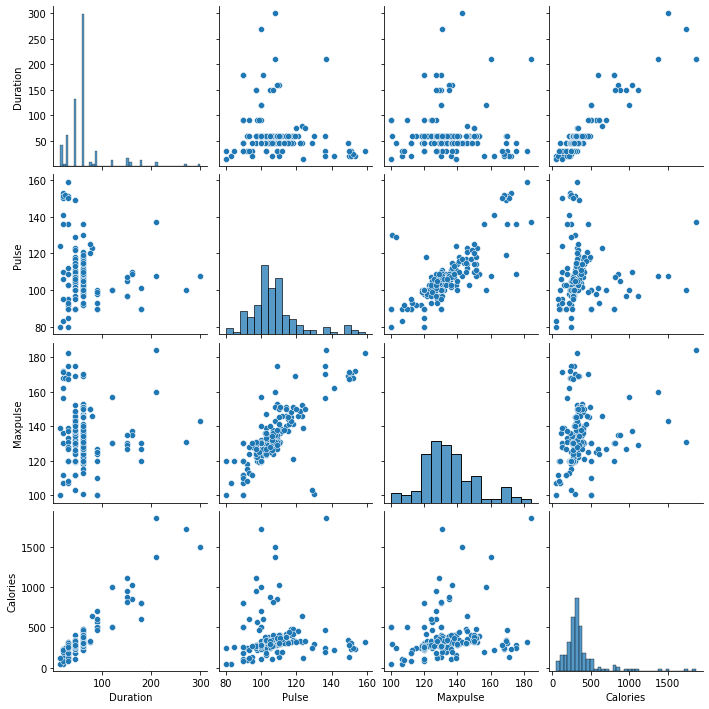

In [11]:
sns.pairplot(df)
plt.show()

## Box plotting The Features

<AxesSubplot:xlabel='Duration'>

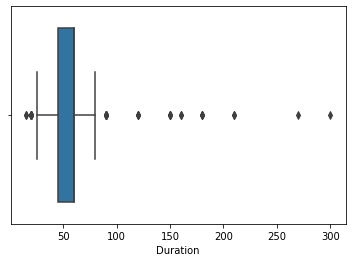

In [12]:
sns.boxplot(data=df,x='Duration')

<AxesSubplot:xlabel='Pulse'>

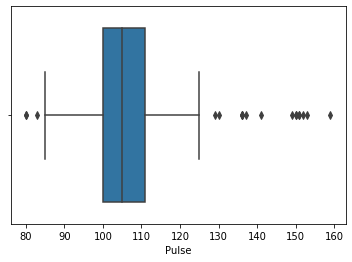

In [13]:
sns.boxplot(data=df,x='Pulse')

<AxesSubplot:xlabel='Maxpulse'>

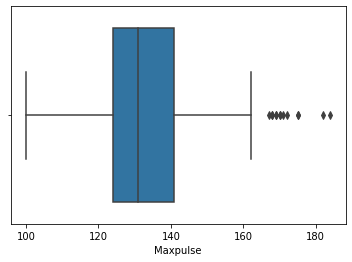

In [14]:
sns.boxplot(data=df,x='Maxpulse')

<AxesSubplot:xlabel='Calories'>

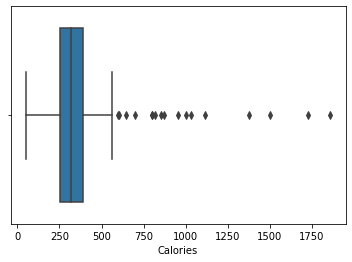

In [15]:
sns.boxplot(data=df,x='Calories')

## Now let's clean our data

> First we work on the NaN values

In [16]:
# As the NaN values are only 5, then we can drop the records containing NaN Values

df.dropna(axis=0,inplace=True)

In [17]:
df.shape

(164, 4)

> Secondly, we will work on the outliers

In [18]:
# We assume that any values above z-score = 3 is an outlier

df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [19]:
df.shape

(157, 4)